**Name - Soumya Basu**

**Reg No - 23MDT0047**


### Loading Libraries

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

### Loading Dataset

In [6]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape dataset to have a single channel
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encoding of labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Model


In [7]:
def AlexNet(input_shape=(227, 227, 1), num_classes=10):
    model = models.Sequential()

    # 1st Convolutional Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(1, 1), padding='same', input_shape=input_shape))
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # 2nd Convolutional Layer
    model.add(layers.Conv2D(192, (5, 5), padding='same'))
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # 3rd Convolutional Layer
    model.add(layers.Conv2D(384, (3, 3), padding='same'))
    model.add(layers.ReLU())

    # 4th Convolutional Layer
    model.add(layers.Conv2D(384, (3, 3), padding='same'))
    model.add(layers.ReLU())

    # 5th Convolutional Layer
    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flattening
    model.add(layers.Flatten())

    # 1st Fully Connected Layer
    model.add(layers.Dense(4096))
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.5))

    # 2nd Fully Connected Layer
    model.add(layers.Dense(4096))
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.5))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


In [8]:
# Instantiate the modified AlexNet model for MNIST
model = AlexNet(input_shape=(28, 28, 1), num_classes=10)

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 192)         │         307,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 14, 14, 192)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 384)           │         663,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 7, 7, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 7, 7, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       9,441,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_6 (ReLU)                       │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 29,449,034 (112.34 MB)

 Trainable params: 29,449,034 (112.34 MB)

 Non-trainable params: 0 (0.00 B)

### Training

In [13]:
from re import VERBOSE
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import Huber
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 10

METRICS = metrics=['accuracy',
                   Precision(name='precision'),
                   Recall(name='recall')]


# Compile the model with RMSprop and Huber loss
model.compile(optimizer='adam',#RMSProp also good
              loss='categorical_crossentropy',
              metrics = METRICS)

# Train the model
training_history = model.fit(x_train, y_train,
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 20ms/step - accuracy: 0.7951 - loss: 0.5831 - precision: 0.9045 - recall: 0.7559 - val_accuracy: 0.9841 - val_loss: 0.0567 - val_precision: 0.9861 - val_recall: 0.9821
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 19ms/step - accuracy: 0.9774 - loss: 0.0848 - precision: 0.9808 - recall: 0.9742 - val_accuracy: 0.9824 - val_loss: 0.0646 - val_precision: 0.9858 - val_recall: 0.9793
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9830 - loss: 0.0661 - precision: 0.9857 - recall: 0.9800 - val_accuracy: 0.9894 - val_loss: 0.0364 - val_precision: 0.9914 - val_recall: 0.9873
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9852 - loss: 0.0549 - precision: 0.9876 - recall: 0.9835 - val_accuracy: 0.9877 - val_loss: 0.0476 - val_precision: 0.9895 - val_recall: 0.9858
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9877 - loss: 0.0519 - precision: 0.9895 - recall: 0.9856 - val_accuracy: 0

### Visualizing

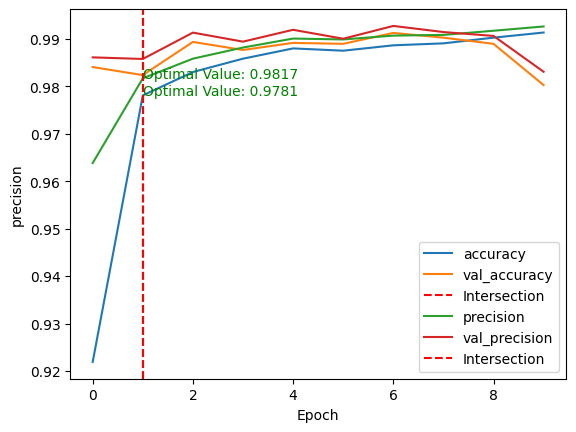

In [14]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy

def show_performance_curve(training_result, metric, metric_label):

    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]

    # Check if there is an intersection
    intersection = np.argwhere(np.isclose(train_perf, validation_perf, atol=1e-2)).flatten()
    if intersection.size > 0: # Check for intersection
        intersection_idx = intersection[0]
        intersection_value = train_perf[intersection_idx]

        plt.plot(train_perf, label=metric_label)
        plt.plot(validation_perf, label = 'val_'+str(metric))
        plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')

        plt.annotate(f'Optimal Value: {intersection_value:.4f}',
                 xy=(intersection_idx, intersection_value),
                 xycoords='data',
                 fontsize=10,
                 color='green')
    else:
        plt.plot(train_perf, label=metric_label)
        plt.plot(validation_perf, label = 'val_'+str(metric))
        print("No intersection found.") # Print message if no intersection

    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')

show_performance_curve(training_history, 'accuracy', 'accuracy')
show_performance_curve(training_history, 'precision', 'precision')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


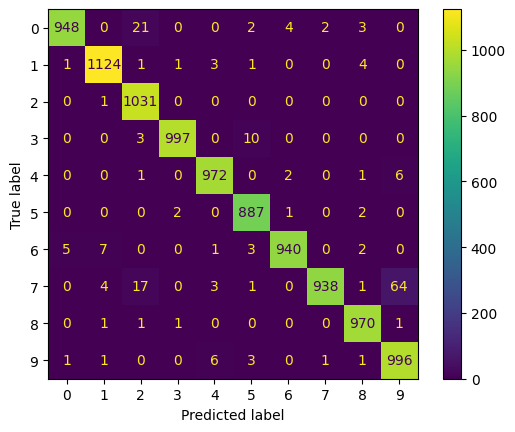

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtain the model's predictions on the test dataset
test_predictions = model.predict(x_test)

# Convert predictions from probabilities to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert one-hot encoded true labels back to class labels
test_true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Create a ConfusionMatrixDisplay instance
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()
